#### Project: Fastage Fraud Detection

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
# Read Data
data = pd.read_csv("../Data/raw/fastag-data.csv")

# View
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
# Shape
data.shape

(5000, 13)

In [4]:
# Check for duplicates
data.duplicated().sum()

0

In [5]:
# Metainformation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


- *Dataset contains 5000 records for fastag transactions, there are no missing values in dataset except for the column 'FastageID'.*

In [6]:
# Analyze the missing FastagID
data[data.FastagID.isnull()]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud
16,17,1/22/2023 16:45,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",62,KA20GH1345,Not Fraud
23,24,1/29/2023 3:05,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",77,KA77UV0123,Not Fraud
30,31,2/5/2023 13:20,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",57,KA92IJ5789,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4967,8/31/2023 6:08,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",47,AP34MN6789,Not Fraud
4973,4974,12/27/2023 19:04,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",84,AP01AB4567,Not Fraud
4980,4981,4/20/2023 6:01,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",74,AP78OP2345,Not Fraud
4987,4988,8/19/2023 18:57,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",90,AP45CD0123,Not Fraud


In [7]:
# Transaction amount with no FastagID
transaction_amt = data[data.FastagID.isnull()]['Transaction_Amount'].unique()
amt_paid = data[data.FastagID.isnull()]['Amount_paid'].unique()

transaction_amt, amt_paid

(array([0], dtype=int64), array([0], dtype=int64))

- *All of these transactions without FastagID has zero for amount paid.*
- *Meaning, there is no record for amount paid for these transactions. so, lets drop all rows with missing FastagID.*

In [8]:
# Drop missing FastagId rows.
data = data.dropna(axis=0).copy()

In [9]:
# Unique values in IDs, and categorical data.
data.nunique()

Transaction_ID           4451
Timestamp                4008
Vehicle_Type                7
FastagID                 4451
TollBoothID                 4
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     4451
Fraud_indicator             2
dtype: int64

In [10]:

for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())
    print('--' * 10)

Timestamp
['1/6/2023 11:20' '1/7/2023 14:55' '1/9/2023 2:05' ... '2/5/2023 5:08'
 '2/20/2023 20:34' '3/10/2023 0:59']
--------------------
Vehicle_Type
['Bus ' 'Car' 'Truck' 'Van' 'Sedan' 'SUV' 'Motorcycle']
--------------------
FastagID
['FTG-001-ABC-121' 'FTG-002-XYZ-451' 'FTG-044-LMN-322' ...
 'FTG-447-PLN-109' 'FTG-458-VFR-876' 'FTG-459-WSX-543']
--------------------
TollBoothID
['A-101' 'B-102' 'C-103' 'D-106']
--------------------
Lane_Type
['Express' 'Regular']
--------------------
Vehicle_Dimensions
['Large' 'Small' 'Medium']
--------------------
Geographical_Location
['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']
--------------------
Vehicle_Plate_Number
['KA11AB1234' 'KA66CD5678' 'KA11GH3456' ... 'KA33WX6789' 'KA35YZ0123'
 'KA37AB3456']
--------------------
Fraud_indicator
['Fraud' 'Not Fraud']
--------------------


In [11]:
# Convert date into datetime type
data['Timestamp'] = pd.to_datetime(data.Timestamp)

In [12]:
# Convert columns
data.rename(columns={col: col.lower() for col in data.columns.tolist()}, inplace=True)

# rename
data.rename(columns={
    'fastagid': 'fastag_id',
    'tollboothid': 'tollbooth_id',
    'vehicle_dimensions': 'vehicle_size'
}, inplace=True)

In [13]:
# Check data types 
data.dtypes

transaction_id                    int64
timestamp                datetime64[ns]
vehicle_type                     object
fastag_id                        object
tollbooth_id                     object
lane_type                        object
vehicle_size                     object
transaction_amount                int64
amount_paid                       int64
geographical_location            object
vehicle_speed                     int64
vehicle_plate_number             object
fraud_indicator                  object
dtype: object

In [14]:
# Summary descriptions
columns = ['transaction_amount', 'amount_paid', 'vehicle_speed']
fraud_desc = data[data.fraud_indicator == 'Fraud'][columns].describe()
notfraud_desc = data[data.fraud_indicator == 'Not Fraud'][columns].describe()

pd.concat([fraud_desc, notfraud_desc], axis=1, keys=['Fraudulent', 'Non-Fraudulent'])

Fraudulent                               Non-Fraudulent  \
      transaction_amount amount_paid vehicle_speed transaction_amount   
count         983.000000  983.000000    983.000000        3468.000000   
mean          193.555443   92.838250     68.340793         177.348616   
std            97.465586   35.230277     16.832977         104.256672   
min            60.000000    0.000000     20.000000           0.000000   
25%           120.000000   90.000000     55.000000         110.000000   
50%           145.000000  100.000000     68.000000         130.000000   
75%           300.000000  110.000000     82.000000         300.000000   
max           350.000000  190.000000    118.000000         350.000000   

                                  
       amount_paid vehicle_speed  
count  3468.000000   3468.000000  
mean    177.348616     67.755479  
std     104.256672     16.575135  
min       0.000000     10.000000  
25%     110.000000     54.000000  
50%     130.000000     67.000000  
75%     300.000000     82.000000  
max     350.000000    118.000000

In [15]:
# Datetime
data['timestamp'].dt.year.unique() # 2023 data

array([2023])

In [16]:
# Total days of records
data['timestamp'].dt.date.nunique() 

365

In [17]:
# Create new columns
data['month'] = data['timestamp'].dt.month
data['weekday'] = data['timestamp'].dt.weekday
data['hour'] = data['timestamp'].dt.hour
data['is_month_end'] = data['timestamp'].dt.is_month_end.astype('int')
data['is_month_start'] = data['timestamp'].dt.is_month_start.astype('int')
data['quarter'] = data['timestamp'].dt.quarter
data['day_month'] = data['timestamp'].dt.strftime(date_format='%d-%m')

In [18]:
# Datetime analysis - Number of fraudulent transaction in each month
# data preparation
monthly_n_transactions = pd.pivot_table(data, values='transaction_id', index='month', columns='fraud_indicator', aggfunc='count')

# for label ticks 
hours = sorted(data.hour.unique().tolist())
months = sorted(data.month.unique().tolist())

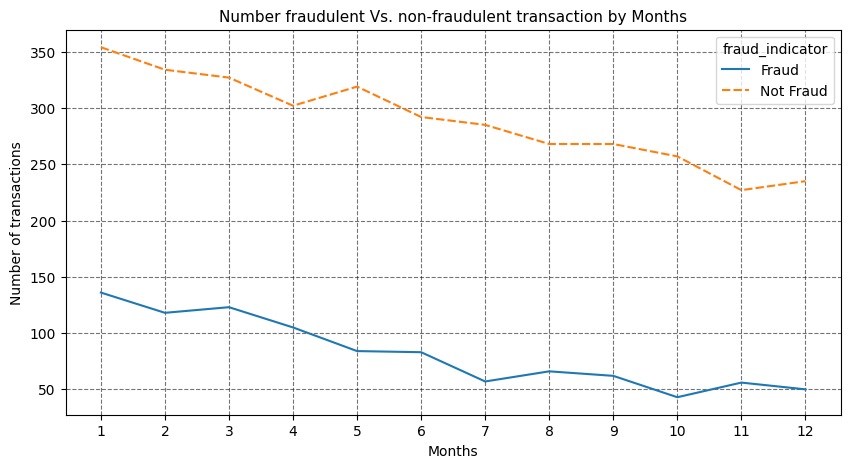

In [19]:
# plot
plt.figure(figsize=(10, 5))
sns.lineplot(monthly_n_transactions)

plt.title('Number fraudulent Vs. non-fraudulent transaction by Months', size=11)
plt.xlabel('Months')
plt.ylabel('Number of transactions')

plt.grid(ls='--', c="#181818", alpha=0.6)
plt.xticks(ticks=months);


- *The lineplot compares the count of total fraudulent and non-fraudulent transactions over months(from 1 to 12) in year 2023.*
- *The line plot represents the decreasing trend in overall fastag transactions.*
- *The line plot shows, the highest number of fraudulent as well as non-fraudulent transaction in January, while the octobar has lowest fraudulent transaction.*

In [20]:
# What is fraction of monthly contribution in total fraudulent transactions?
pct_fraud = (monthly_n_transactions['Fraud'] * 100 / monthly_n_transactions['Fraud'].sum()).reset_index()
pct_fraud.columns = ['Month', 'Fraud_Percent']

pct_fraud.sort_values(by='Fraud_Percent', ascending=False)

,Month,Fraud_Percent
0,1,13.835198
2,3,12.512716
1,2,12.004069
3,4,10.681587
4,5,8.545270
5,6,8.443540
7,8,6.714140
8,9,6.307223
6,7,5.798576
10,11,5.696846


- *The first quarter (the first four months of the year-January, February, March and April) seems to have hightest fraudelent transaction over the year 2023.*

In [21]:
# What happened in January?
jan_23 = data[data.month == 1]

jan_23[jan_23.fraud_indicator=='Fraud'].groupby(by='day_month').count()['transaction_id'].sort_values(ascending=False).head()

day_month
15-01    9
03-01    7
24-01    7
23-01    7
07-01    7
Name: transaction_id, dtype: int64

In [22]:
# day-name: 0 -> Monday, 1 -> Tuesday, 2 -> Wednesday, 3 -> Thursday, 4 -> Friday, 5 -> Saturday, 6 -> Sunday
jan_23.loc[jan_23.day_month == '15-01', 'weekday'].head(1)

126    6
Name: weekday, dtype: int32

- *The highest fraudulent transaction observed on Sunday, 15th January.*

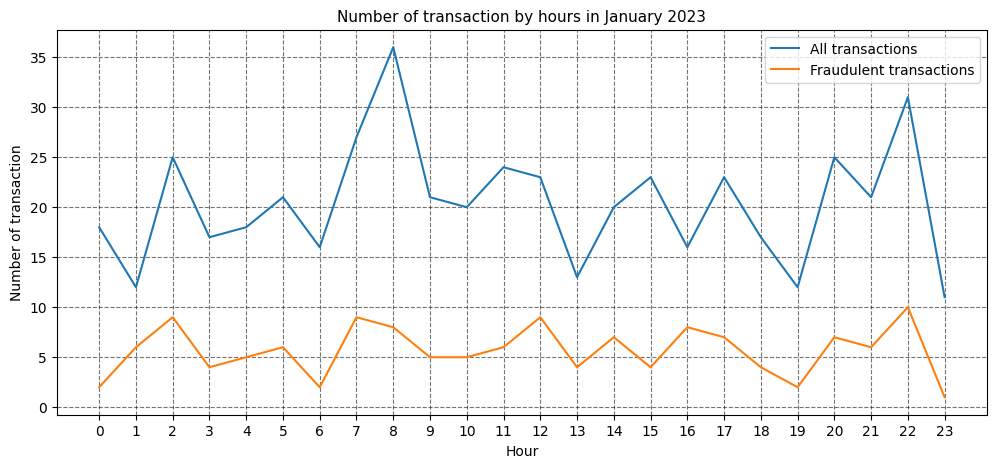

In [23]:
# What are the most common hours for fraudulent transaction in January?

# Data preparation
pivot_nt = pd.pivot_table(jan_23, values='transaction_id', columns='fraud_indicator', index='hour', aggfunc='count')
pivot_nt['total_transactions'] = pivot_nt['Fraud'] + pivot_nt['Not Fraud']

# plot
plt.figure(figsize=(12, 5))
sns.lineplot(pivot_nt['total_transactions'], label='All transactions')
sns.lineplot(pivot_nt['Fraud'], label='Fraudulent transactions')

plt.title('Number of transaction by hours in January 2023', size=11)
plt.xlabel('Hour')
plt.ylabel('Number of transaction')
plt.grid(ls='--', c="#181818", alpha=0.6)
plt.xticks(ticks=hours, color='#000')
plt.show()

- *The above lineplot shows the total number of hourly transaction in January 2023.*
- *The highest fraudulent transactions are observed at the peakest hours in January.*

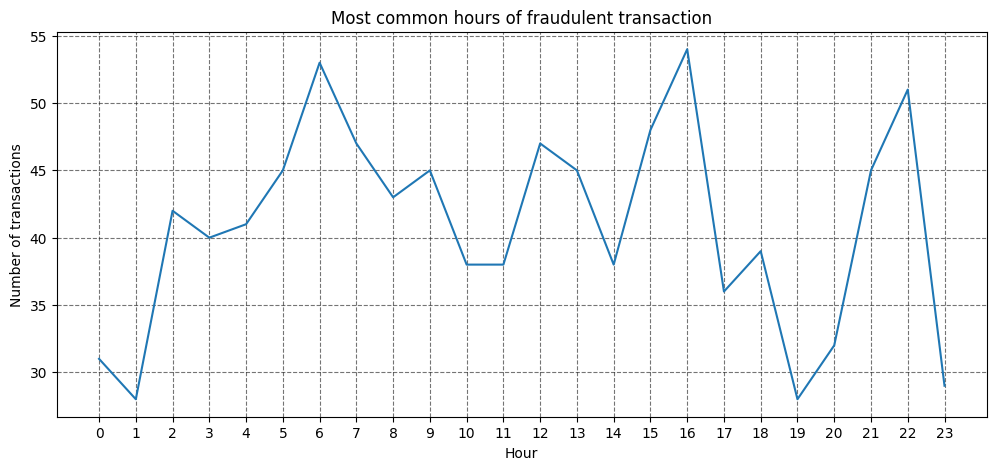

In [24]:
# What is the most common hour for fraudulent transaction in 
pivot_nt = pd.pivot_table(data, values='transaction_id', columns='fraud_indicator', index='hour', aggfunc='count')

plt.figure(figsize=(12, 5))
sns.lineplot(pivot_nt['Fraud'])

plt.title('Most common hours of fraudulent transaction')
plt.xlabel('Hour')
plt.ylabel('Number of transactions')

plt.grid(ls='--', c="#181818", alpha=0.6)
plt.xticks(ticks=hours);


- *The line plot has some noticeable peaks at around Early mornings (around 2nd and 6th hour), and late evening (around 16th and 22th hour).*
- *Lunchtime (around 12th hour) could be another peak.*
- *This might happend because these are the peak traffic hours.*

There might be difference in patterns for weeekdays and weekends. Let's analysis further for days of the week.

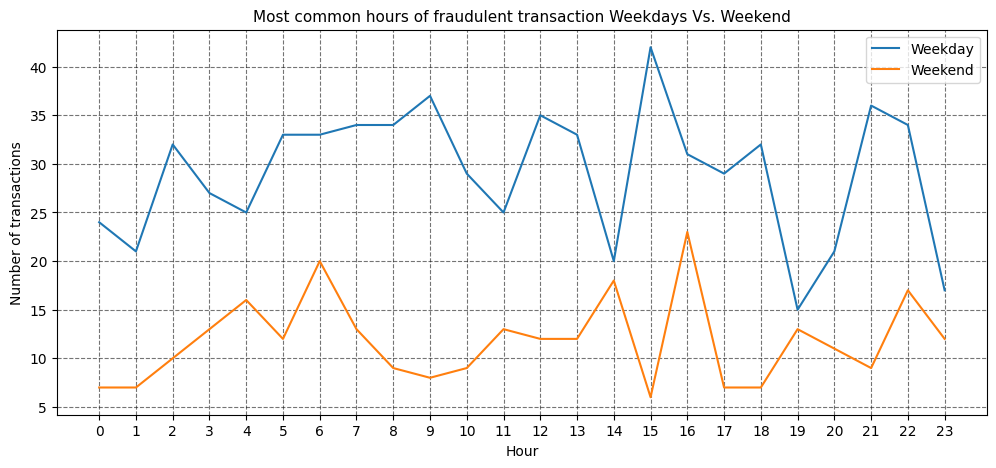

In [25]:
# Is there any difference in fraud patterns for weekdays and weekends.

# Data preparation
# filter data
fraud_data = data[data.fraud_indicator=='Fraud']
weekdays = fraud_data[fraud_data.weekday <= 4]
weekends = fraud_data[fraud_data.weekday > 4]

# Get the count of transaction by hour
weekdays_grp = weekdays.groupby(by='hour')['transaction_id'].count()
weekends_grp = weekends.groupby(by='hour')['transaction_id'].count()


plt.figure(figsize=(12, 5))
sns.lineplot(weekdays_grp, label='Weekday')
sns.lineplot(weekends_grp, label='Weekend')

plt.title('Most common hours of fraudulent transaction Weekdays Vs. Weekend', size=11)
plt.xlabel('Hour')
plt.ylabel('Number of transactions')

plt.grid(ls='--', c="#181818", alpha=0.6)
plt.xticks(ticks=hours);


- *The above line graph shows the fraud transactions patterns for weekdays and weekends.* 
- *The number of transactions on weekends are less compare to weekdays.*
- *The main difference can observed at the 15th hour, which has highest peak for weekdays however, lowest for the weekends, this might happend becuase it is not busy traffic hour on weekends.*
- *Similary, the hours that has lowest peak on weekdays has highest peak for weekends (around 14th, and 19th hour)*
- *Overall pattern of early mornings and late evening highest fraudulent transaction can observed in both*

In [26]:
# Earlier we saw that the first four months have higher rate of fraudulent transaction. Let's confirm our finding by analyzing the data by quarter start and end attributes.
data.groupby(by=['fraud_indicator', 'quarter'])['transaction_id'].count()

fraud_indicator  quarter
Fraud            1           377
                 2           272
                 3           185
                 4           149
Not Fraud        1          1015
                 2           913
                 3           821
                 4           719
Name: transaction_id, dtype: int64

In [27]:
# Total transaction amount and acutal amount paid by quarter.
grp_data = data.groupby(by=['fraud_indicator', 'quarter'])[['transaction_amount', 'amount_paid']].sum()

In [28]:
grp_data['amt_paid_percent'] = grp_data['amount_paid'] * 100 / grp_data['transaction_amount']
grp_data = grp_data.reset_index()

In [29]:
grp_data

,fraud_indicator,quarter,transaction_amount,amount_paid,amt_paid_percent
0,Fraud,1,75305,35755,47.480247
1,Fraud,2,51880,24900,47.995374
2,Fraud,3,35275,16985,48.150248
3,Fraud,4,27805,13620,48.983996
4,Not Fraud,1,183010,183010,100.000000
5,Not Fraud,2,160625,160625,100.000000
6,Not Fraud,3,142865,142865,100.000000
7,Not Fraud,4,128545,128545,100.000000


The rate of actual amount paid in fraudulent transaction is always less than 50% for all the quarters, whereas in genuine transactions is 100%.

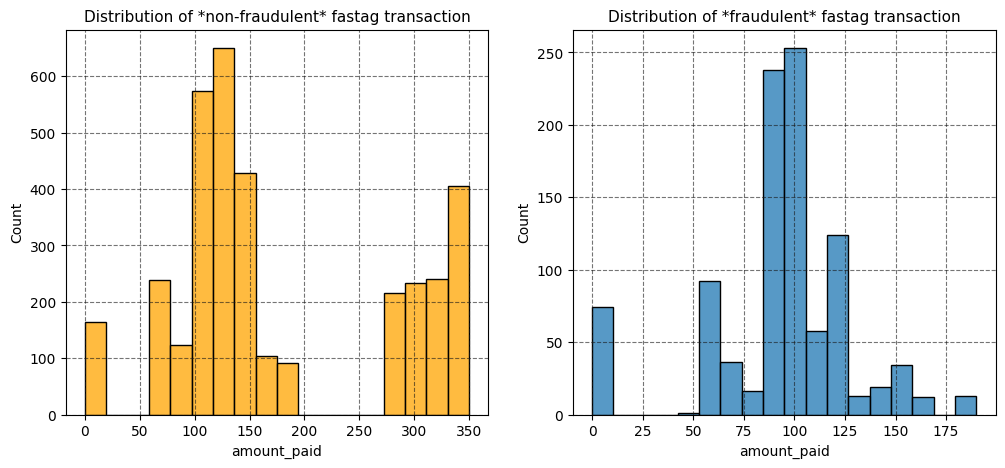

In [30]:
# Distribution of amount paid
non_fraudulent_amount = data[data['fraud_indicator'] == 'Not Fraud']['amount_paid']
fraudulent_amount = data[data['fraud_indicator'] == 'Fraud']['amount_paid']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(non_fraudulent_amount, bins=18, color='orange', ax=ax1)
sns.histplot(fraudulent_amount, bins=18, ax=ax2)

ax1.grid(ls='--', c="#181818", alpha=0.6)
ax2.grid(ls='--', c="#181818", alpha=0.6)

ax1.set_title('Distribution of *non-fraudulent* fastag transaction', size=11)
ax2.set_title('Distribution of *fraudulent* fastag transaction', size=11);

- *Histogram plot shows the distribution of amount paid in non-fraudulent transaction(left) and fraudulent transaction(right).*
- *The graph shows multiple groups for both transaction, which represent the multi-model distribution.*

In [31]:
# Vehicle type
data.vehicle_type.unique()

array(['Bus ', 'Car', 'Truck', 'Van', 'Sedan', 'SUV', 'Motorcycle'],
      dtype=object)

Notice, 'Bus ' it is with the space. So, let's clean the data by removing the extra whitespaces in data.

In [32]:
# Remove whitespace.
columns = ['vehicle_type', 'lane_type', 'vehicle_size', 'fraud_indicator']

data[columns] = data[columns].apply(lambda x: x.str.strip())

In [33]:
# Examine the data for Motorcycle.
type_filter = data.vehicle_type == 'Motorcycle'
print(data[type_filter]['transaction_amount'].value_counts())
print("--"*10)
print(data[type_filter]['fraud_indicator'].value_counts())

transaction_amount
0    165
Name: count, dtype: int64
--------------------
fraud_indicator
Not Fraud    165
Name: count, dtype: int64


You see, for the motorcycle type of vehicle has no transaction charges, so it has no fraud indicator. We can say that, if vehicle type is Motorcycle, then there will no fraud.

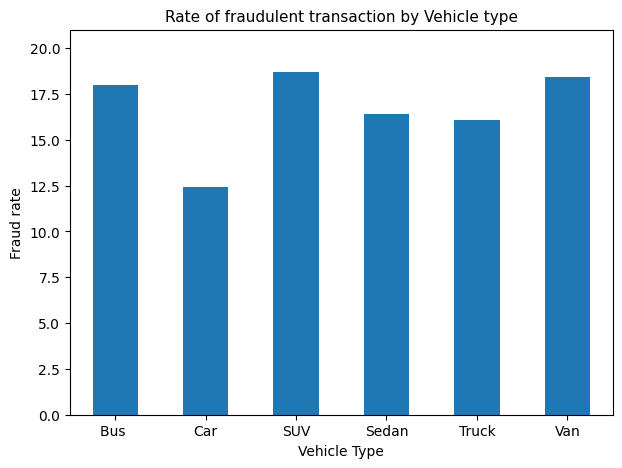

In [34]:
# Calcuate the rate of fraudulent transaction by vehicle type.
# Data preparation
vehicle_type_pivot = pd.pivot_table(fraud_data, values='transaction_id', index='vehicle_type', columns='fraud_indicator', aggfunc='count')
fraud_rate = vehicle_type_pivot['Fraud'] * 100/ fraud_data.shape[0]

# Plot

fraud_rate.plot(kind='bar', figsize=(7, 5))

plt.ylim(ymax=21)
plt.title('Rate of fraudulent transaction by Vehicle type', size=11)
plt.xlabel('Vehicle Type')
plt.ylabel('Fraud rate')

plt.xticks(rotation='horizontal')
plt.show()

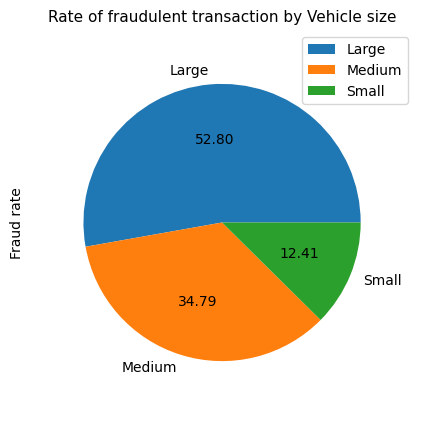

In [35]:
# Calcuate the rate of fraudulent transaction by vehicle size.
# Data preparation
vehicle_type_pivot = pd.pivot_table(fraud_data, values='transaction_id', index='vehicle_size', columns='fraud_indicator', aggfunc='count')
fraud_rate = vehicle_type_pivot['Fraud'] * 100/ fraud_data.shape[0]

# Plot

fraud_rate.plot(kind='pie', figsize=(7, 5), autopct='%.2f', radius=0.9)

plt.title('Rate of fraudulent transaction by Vehicle size', size=11)
plt.legend()
plt.ylabel('Fraud rate')
plt.show()

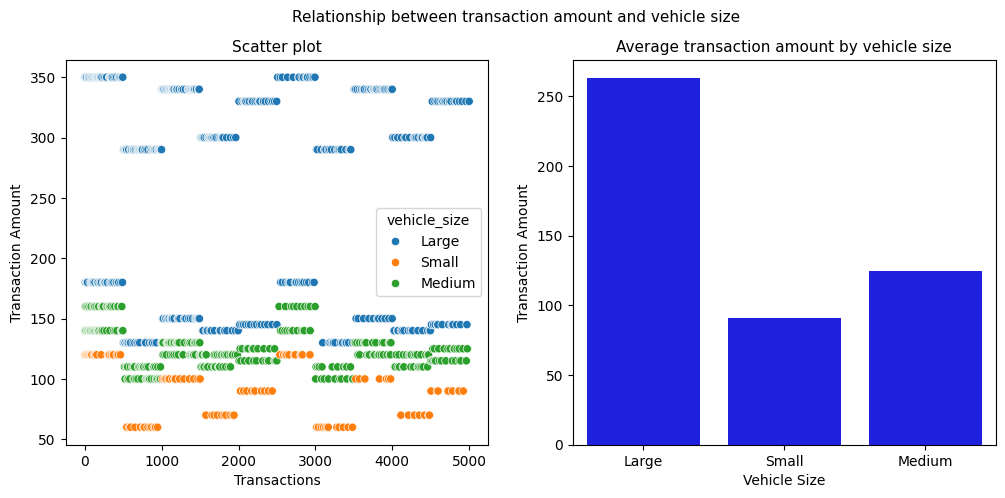

In [36]:
# Does transaction amount depends on size of the vehicle?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(fraud_data, x='transaction_id', y='transaction_amount', hue='vehicle_size', ax=ax1)
sns.barplot(fraud_data, x='vehicle_size', y='transaction_amount', estimator='mean', ax=ax2, color='blue', errorbar=None)

# labels
fig.suptitle("Relationship between transaction amount and vehicle size", size=11)
ax1.set_title('Scatter plot', size=11)
ax2.set_title("Average transaction amount by vehicle size", size=11)

ax1.set_xlabel('Transactions')
ax2.set_xlabel('Vehicle Size')

ax1.set_ylabel('Transaction Amount')
ax2.set_ylabel('Transaction Amount');

- *The scatter plot shows the relationship between the transaction amount and vehicle size.*
- *The plot shows that linear relation between transaction amount and size of the vehicle because the amount increases as size or dimensions of the vehicle increase.*

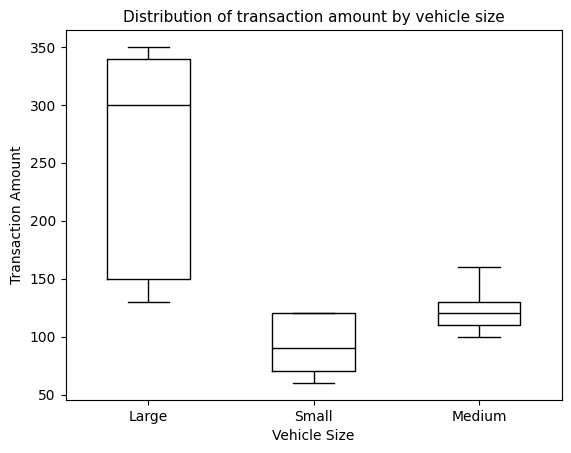

In [37]:
# Distribution of transaction amount for fraudulent transaction by vehicle size.
sns.boxplot(fraud_data, x='vehicle_size', y='transaction_amount', width=0.5, color='#000', linewidth=1, fill=False)

# labels
plt.title("Distribution of transaction amount by vehicle size", size=11)
plt.xlabel('Vehicle Size')
plt.ylabel('Transaction Amount');

- *The boxplot represents the distribution and variation in transaction amount over different size of vehicles.*
- *The variation in mean value of transaction amount for different vehicle size represent the relation between them.*
- *Large vehicle tends to have large transaction amount but with large variation.*

In [38]:
# What is rate of fradulent transaction for differnt lane types
data.lane_type.value_counts()

lane_type
Regular    2309
Express    2142
Name: count, dtype: int64

In [39]:
data.groupby(by=['lane_type', 'fraud_indicator'])['transaction_id'].count()

lane_type  fraud_indicator
Express    Fraud               490
           Not Fraud          1652
Regular    Fraud               493
           Not Fraud          1816
Name: transaction_id, dtype: int64

In [40]:
# What is fraudent transaction amount for different type of lanes?
pd.pivot_table(data, values='transaction_amount', columns='lane_type', index='fraud_indicator')

lane_type,Express,Regular
fraud_indicator,,
Fraud,189.989796,197.099391
Not Fraud,187.230630,168.359031


- *The lane data is pretty balance and has no significant effect on fraudulent transaction.*
- *As we can see that the number of fraudulent transaction on both express and regular lane type is almost equal to ~490.*
- *However, there is significant difference in average transaction amount on regular lane type for fraudulent and genuine transactions.*

In [41]:
# Tollbooth ID
data.tollbooth_id.nunique()

4

In [42]:
# What is rate of fraudulent transaction by tollbooth.
a = pd.pivot_table(data, values='transaction_id', index='tollbooth_id', columns='fraud_indicator', aggfunc='count', fill_value=0)
a['pct_fraud'] = a['Fraud'] * 100 / (a['Fraud'] + a['Not Fraud'])
a.sort_values(by='pct_fraud', ascending=False)

fraud_indicator,Fraud,Not Fraud,pct_fraud
tollbooth_id,,,
B-102,367,1065,25.628492
C-103,333,1093,23.352034
A-101,283,1145,19.817927
D-106,0,165,0.000000


In [43]:
# Examine the data for tollbooth_id 'D-106' where, fraud rate is 0%.
data[data.tollbooth_id == 'D-106']['fraud_indicator'].value_counts()

fraud_indicator
Not Fraud    165
Name: count, dtype: int64

In [44]:
# Get the unique value in attributes for tollbooth ID D-106, if it is only value else get the total number of unique values.
data[data.tollbooth_id == 'D-106'].apply(lambda x: x.unique()[0] if len(x.unique()) == 1 else x.nunique())

transaction_id                  165
timestamp                       165
vehicle_type             Motorcycle
fastag_id                       165
tollbooth_id                  D-106
lane_type                   Regular
vehicle_size                  Small
transaction_amount                0
amount_paid                       0
geographical_location             4
vehicle_speed                    56
vehicle_plate_number            165
fraud_indicator           Not Fraud
month                            12
weekday                           7
hour                             24
is_month_end                      2
is_month_start                    2
quarter                           4
day_month                       118
dtype: object

- *The tollboothID 'D-106' is for a particular vehicle type which is Motorcycle, and Regular lane type.*
- *The Motorcycle has no transaction charges and hence it has no fraudulent trasactions activities.*

In [45]:
fraud_data.groupby(by=['tollbooth_id', 'geographical_location'])['transaction_id'].count()

tollbooth_id  geographical_location                
A-101         12.84197701525119, 77.67547528176169     56
              12.936687032945434, 77.53113977439017    48
              13.042660878688794, 77.47580097259879    59
              13.059816123454882, 77.77068662374292    75
              13.21331620748757, 77.55413526894684     45
B-102         12.84197701525119, 77.67547528176169     83
              12.936687032945434, 77.53113977439017    67
              13.042660878688794, 77.47580097259879    69
              13.059816123454882, 77.77068662374292    99
              13.21331620748757, 77.55413526894684     49
C-103         12.84197701525119, 77.67547528176169     92
              12.936687032945434, 77.53113977439017    53
              13.042660878688794, 77.47580097259879    71
              13.059816123454882, 77.77068662374292    72
              13.21331620748757, 77.55413526894684     45
Name: transaction_id, dtype: int64

In [46]:
fraud_data.groupby(by=['tollbooth_id', 'vehicle_size'])['transaction_id'].count()

tollbooth_id  vehicle_size
A-101         Large             2
              Medium          161
              Small           120
B-102         Large           184
              Medium          181
              Small             2
C-103         Large           333
Name: transaction_id, dtype: int64

In [47]:
data.groupby(by=['tollbooth_id', 'vehicle_size'])['transaction_id'].count()
pd.pivot_table(data, 'transaction_id', 'tollbooth_id', ['fraud_indicator', 'vehicle_type'], aggfunc='count', fill_value=0)

fraud_indicator Fraud                            Not Fraud                  \
vehicle_type      Bus  Car  SUV Sedan Truck  Van       Bus  Car Motorcycle   
tollbooth_id                                                                 
A-101               2  120    0   161     0    0         2  590          0   
B-102               0    2  184     0     0  181         0    2          0   
C-103             175    0    0     0   158    0       537    0          0   
D-106               0    0    0     0     0    0         0    0        165   

fraud_indicator                        
vehicle_type     SUV Sedan Truck  Van  
tollbooth_id                           
A-101              0   553     0    0  
B-102            530     0     0  533  
C-103              0     0   556    0  
D-106              0     0     0    0

In [48]:
# What is rate of fraudulent transaction for vehicle size on each tollbooth?
a = pd.pivot_table(fraud_data, values='transaction_id', index=['tollbooth_id', 'vehicle_size'], columns='fraud_indicator', aggfunc='count', fill_value=0)
b = pd.pivot_table(fraud_data, values='transaction_id', index=['tollbooth_id'], columns='fraud_indicator', aggfunc='count', fill_value=0)
b.columns = ['Total Fraud']
pct_vehicle_size = (a['Fraud'] * 100 / b['Total Fraud'])

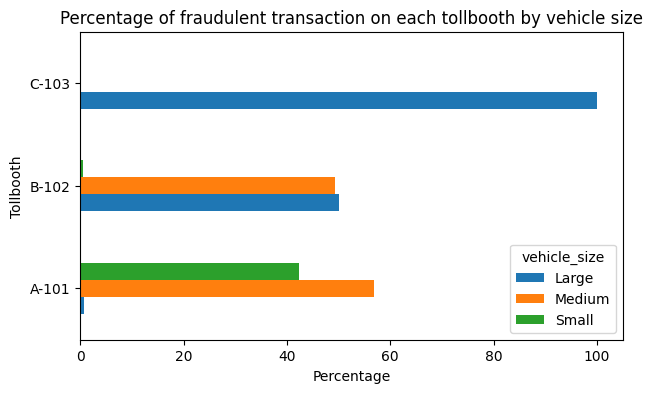

In [49]:
# plot
pct_vehicle_size.unstack().plot(kind='barh', 
                                figsize=(7, 4),
                                xlabel='Percentage',
                                ylabel='Tollbooth',
                                title="Percentage of fraudulent transaction on each tollbooth by vehicle size")

plt.show()

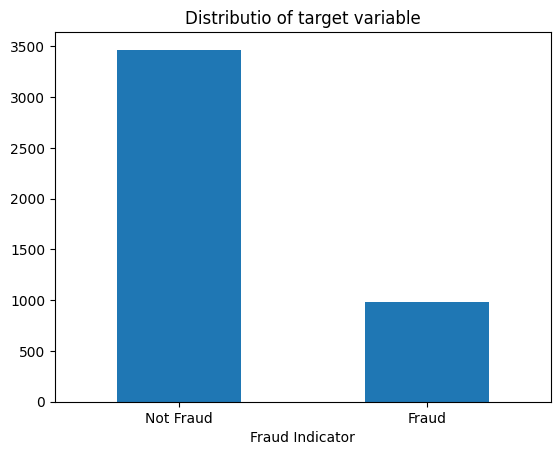

In [50]:
# Distribution of target variable.
data.fraud_indicator.value_counts().plot(kind='bar', xlabel='Fraud Indicator', title='Distributio of target variable')
plt.xticks(rotation='horizontal');

- *The bar shows that there is imbalance in distribution of the target variable.*

In [51]:
# Create a new variable for state of the vehicle registration state.
data['vehicle_reg_state'] = data['vehicle_plate_number'].apply(lambda x: x[:2])

In [52]:
n_frauds = data.fraud_indicator.value_counts().iloc[0]
n_not_frauds = data.fraud_indicator.value_counts().iloc[1]

In [53]:
a = pd.pivot_table(data, values='transaction_id', columns='fraud_indicator', index='vehicle_reg_state', aggfunc='count')
a['pct_fraud'] = a['Fraud'] * 100 / n_frauds
a['pct_not_fraud'] = a['Not Fraud'] * 100 / n_not_frauds

In [54]:
a

fraud_indicator,Fraud,Not Fraud,pct_fraud,pct_not_fraud
vehicle_reg_state,,,,
AP,68,334,1.960784,33.977620
BR,6,15,0.173010,1.525941
DL,12,94,0.346021,9.562564
GA,93,346,2.681661,35.198372
GJ,16,89,0.461361,9.053917
HR,5,16,0.144175,1.627670
KA,623,1933,17.964245,196.642930
KL,14,85,0.403691,8.646999
MH,92,344,2.652826,34.994914


In [55]:
data['lat'] = data['geographical_location'].apply(lambda x: x.split(',')[0])
data['long'] = data['geographical_location'].apply(lambda x: x.split(',')[1])

### Data Preprocessing

In [56]:
# Feature selection
cat_columns = ['vehicle_type','tollbooth_id', 'lane_type', 'vehicle_size', 'vehicle_reg_state']
num_columns = ['transaction_amount', 'amount_paid', 'lat', 'long', 'vehicle_speed']

In [57]:
# Split data into X and y
X = data[cat_columns + num_columns]
y = data['fraud_indicator']
y = y.apply(lambda x: x =='Fraud' ).astype('int')

# Split data into traning and validation dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [58]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

oh_en = OneHotEncoder()
oh_en.fit(x_train[cat_columns])

# Transform the training and test dataset
cat_x_train = oh_en.transform(x_train[cat_columns]).toarray()
cat_x_test = oh_en.transform(x_test[cat_columns]).toarray()

In [59]:
cat_x_train_df = pd.DataFrame(cat_x_train, columns=oh_en.get_feature_names_out())
cat_x_test_df = pd.DataFrame(cat_x_test, columns=oh_en.get_feature_names_out())

In [60]:
# Scale the numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train[num_columns])

# Transform the training and test dataset
num_x_train = scaler.transform(x_train[num_columns])
num_x_test = scaler.transform(x_test[num_columns])

In [61]:
num_x_train_df = pd.DataFrame(num_x_train, columns=scaler.get_feature_names_out())
num_x_test_df = pd.DataFrame(num_x_test, columns=scaler.get_feature_names_out())

In [62]:
# final datasets
final_x_train = pd.concat([cat_x_train_df, num_x_train_df], axis=1)
final_x_test = pd.concat([cat_x_test_df, num_x_test_df], axis=1)

### Model selection

In [63]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

# metrics for model evaluations
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [64]:
# Model selection with default settings
models = {
    'linear-models' : LogisticRegression(random_state=42),
    'd-tree' : DecisionTreeClassifier(random_state=42),
    'random-forest': RandomForestClassifier(random_state=42),
    'gradient-boost': GradientBoostingClassifier(random_state=42),
    'extra-tree': ExtraTreesClassifier(random_state=42),
    'neighbors': KNeighborsClassifier(),
    'naive-bayes': GaussianNB(),
    'xgb-clf': XGBClassifier(random_state=42),
    'svc': SVC(random_state=42)
}

model_scores = []
for name, model in models.items():

    scores = cross_val_score(estimator=model, X=final_x_train, y=y_train, cv=10, scoring='f1_macro', n_jobs=-1)
    model_scores.append((name, scores.mean(), scores.std()))

In [65]:
pd.DataFrame(model_scores, columns=['classifier', 'f1 score', 'std']).style.highlight_max(color='purple', subset=['f1 score'])

,classifier,f1 score,std
0,linear-models,0.947163,0.018358
1,d-tree,0.994355,0.005538
2,random-forest,0.985736,0.006085
3,gradient-boost,0.989572,0.006710
4,extra-tree,0.974523,0.010059
5,neighbors,0.818936,0.030235
6,naive-bayes,0.280534,0.019259
7,xgb-clf,0.995297,0.003643
8,svc,0.927298,0.017929


Decision tree algorithms out perform the model, by giving accuracy greater than 97% for almost all of the ensembles. There is higher chances that model might overfit the training data. To evaluate performance of model further, let us use the precision score on selected algorithm.

- Random forest
- Decision tree 
- Xgboost

In [66]:
# Model evaluation
def get_score(y_true, y_preds):

    # Compute scores
    precision = precision_score(y_true, y_preds)
    f1score = f1_score(y_true, y_preds)
    accuracy = accuracy_score(y_true, y_preds)
    class_report = confusion_matrix(y_true, y_preds)

    return precision, f1score, accuracy, class_report

def eval_clf(classifier):
    clf = classifier.fit(final_x_train, y_train)
    y_preds = clf.predict(final_x_test)
    return clf, get_score(y_test, y_preds)

In [67]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)
rf_clf, (precision, f1score, accuracy, class_report) = eval_clf(rf_clf)

print("Precision:: %.3f" %precision)
print("F1 Score:: %.3f" %f1score)
print("Accuracy:: %.3f" %accuracy)
print(class_report)

Precision:: 1.000
F1 Score:: 0.370
Accuracy:: 0.829
[[1041    0]
 [ 228   67]]


In [68]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf, (precision, f1score, accuracy, class_report) = eval_clf(dt_clf)

print("Precision:: %.3f" %precision)
print("F1 Score:: %.3f" %f1score)
print("Accuracy:: %.3f" %accuracy)

print(class_report)

Precision:: 1.000
F1 Score:: 0.852
Accuracy:: 0.943
[[1041    0]
 [  76  219]]


In [69]:
# XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
xgb_clf, (precision, f1score, accuracy, class_report) = eval_clf(xgb_clf)

print("Precision: %.3f" %precision)
print("F1 Score: %.3f" %f1score)
print("Accuracy: %.3f" %accuracy)

print(class_report)

Precision: 1.000
F1 Score: 0.986
Accuracy: 0.994
[[1041    0]
 [   8  287]]


### Hyperparameter tunning

In [71]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

scale_positive_weight = (y_train==0).sum() / (y_train==1).sum()

# Model definiation
xgb_clf = XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_positive_weight, max_delta_step=1, random_state=42)

params = {
    'max_depth': range(3, 11, 2),
    'learning_rate': [0.1, 0.01, 0.02],
    'n_estimators': range(200, 1200, 100),
    'gamma': [0.01, 0.1],
    'subsample': [0.4, 0.5, 0.6, 0.7]
}


# define grid search algorithm
grid_model = GridSearchCV(estimator=xgb_clf, param_grid=params, scoring='f1_macro', n_jobs=-1, cv=5, return_train_score=True)

# fit the mdoel
grid_model.fit(final_x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.1, 0.01, 0.02],
                         'max_depth': range(3, 11, 2),
                         'n_estimators': range(200, 1200, 100),
                         'subsample': [0.4, 0.5, 0.6, 0.7]},
             return_train_score=True, scoring='f1_macro')

In [ ]:
# Make prediction using this model and find the score.
y_preds = grid_model.predict_proba(final_x_test)[0:, 1]
y_preds = np.array([1 if y_t > 0.6 else 0 for y_t in y_preds])
score = f1_score(y_test, y_preds)
print(score)

### Model evaluation

In [92]:
# Get the best estimator
final_xgb_model = grid_model.best_estimator_

# fit the model on the best model
final_xgb_model.fit(final_x_train, y_train)
y_predicts = final_xgb_model.predict(final_x_test)
print('Score: %.3f' %f1_score(y_test, y_predicts))


Score: 0.990
